In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


In [2]:
data_path = os.path.join(os.getcwd(), 'Data/PartA', "20ng_train.csv")
train_set = pd.read_csv(data_path, compression = "bz2")
train_set_y = train_set["class"]
train_set_X = train_set.drop(columns = "class")
train_set_y

data_path = os.path.join(os.getcwd(), 'Data/PartA', "20ng_test.csv")
test_set = pd.read_csv(data_path, compression = "bz2")
test_set_y = test_set["class"]
test_set_X = test_set.drop(columns = "class")

data_path = os.path.join(os.getcwd(), 'Data/PartA', "20ng_labels.csv")
labels = pd.read_csv(data_path, compression = "bz2")
print(labels)

train_set_X

                          0
0  comp.sys.ibm.pc.hardware
1     comp.sys.mac.hardware
2                 rec.autos
3           rec.motorcycles
4                 sci.crypt
5           sci.electronics
6    soc.religion.christian
7        talk.religion.misc


,__,ability,able,ac,accept,access,according,account,act,action,...,world,worth,wouldn,write,written,wrong,wrote,year,years,yes
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.111667,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.0,0.000000,0.186521,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.0,0.182272,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [3]:
#train_set_X.describe()

[737, 722, 742, 747, 743, 738, 748, 471]


1.0

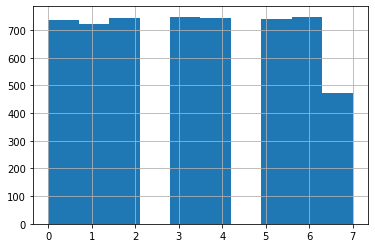

In [4]:
train_set_y.describe()
train_set_y.hist()
counter = [0,0,0,0,0,0,0,0]
for i in range(train_set_y.size):
    if train_set_y[i] == 0:
        counter[0] +=1 
    if train_set_y[i] == 1:
        counter[1] +=1
    if train_set_y[i] == 2:
        counter[2] +=1
    if train_set_y[i] == 3:
        counter[3] +=1
    if train_set_y[i] == 4:
        counter[4] +=1
    if train_set_y[i] == 5:
        counter[5] +=1
    if train_set_y[i] == 6:
        counter[6] +=1
    if train_set_y[i] == 7:
        counter[7] +=1
        
print(counter)
train_set_X.max(axis = 0).max()

# 1.1

As we expected, the dimensionality of the training dataset is extremely high (1000 columns) plus the target class. We expected that since we have a total of 1000 words used in the newsgroups, and each word is a feature itself. The most frequent value for a feature is 0 (sparse dataset), which is normal because we know that in a comment/text very few words will be present. We have 5648 documents. The value that each attribute takes is in the range [0,1]. Using a histogram to visualize the class distribution of the training data, we see that all the classes except "talk.religion.misc" contain almost the same number of documents (around 750, but class7 only around 460).

In [5]:
#test_set_X

In [6]:
#test_set_X.describe()

1.0

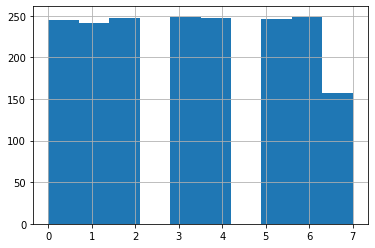

In [7]:
test_set_y.hist()
test_set_X.max(axis = 0).max()

# 1.2

The proportion of training/test set is good (75-25), and we observe the same class distribution. However, in training set we have smaller mean in the features, but the mean maximum value is almost 1. In contrast, in testing set we have a bigger mean but the mean maximum value is 0.86. That means that the documents contain a wider distribution of words, but do not contain "strong" words in order to make it more clear for which one is its class. 

# 1.3

TF-IDF is way more useful than using just frequency of times a word appears in a document. TF-IDF actually is giving a metric of how much "important" a word is in the particular document since it is takes into account if the word occurs in other documents too. If so, then the value will be smaller which means that it gives us less information about the correlation between the document and the class. 

# 2.1

The k-means algorithm is not deterministic since its initialization includes a random selection of the centroids. This means that running the algorithm several times on the same data, could give different results. The implementation on SKLearn does not select randomly the position of the centroids, but initializes them to be generally distant from each other, leading to provably better results than random initialization.

# 2.2

The number of class labels gives us the number of K. Since we have 8 different labels on the data, we can say that K = 8.

# 2.3

An expression about the information gain in terms of entropy can be given with the following expression.
\[ MI(X;Y) = H(Y) - H(Y|X) \]
This expression, in other words says that, the information gain is equal to the amount of uncertainty of Y which is removed by knowing X.

This is applicable here, since we know the class of each instance X. This does not happen when clustering is used, because it is unsupervised and we do not know the target. That is why it is very difficult to have information gain about two variables in practice. 

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_mutual_info_score

scores = []

for i in range(2,13):
    kmeans = KMeans(n_clusters=i, random_state=1000, n_init = 50).fit(train_set_X)
    pred = kmeans.predict(train_set_X)
    print(pred)
    ami = adjusted_mutual_info_score(labels_pred = pred, labels_true = train_set_y, average_method = "max")
    scores.append(ami)
    #print(kmeans.labels_)

[0 0 0 ... 0 0 0]
[1 1 1 ... 1 1 1]
[3 3 3 ... 3 3 3]
[0 0 0 ... 0 0 4]
[1 1 1 ... 1 1 1]
[4 4 4 ... 4 4 3]
[1 1 1 ... 1 1 0]
[3 3 3 ... 3 3 0]
[9 9 9 ... 9 9 0]
[10 10 10 ... 10 10  7]
[ 1  1  1 ...  1  1 11]


<Figure size 432x288 with 0 Axes>

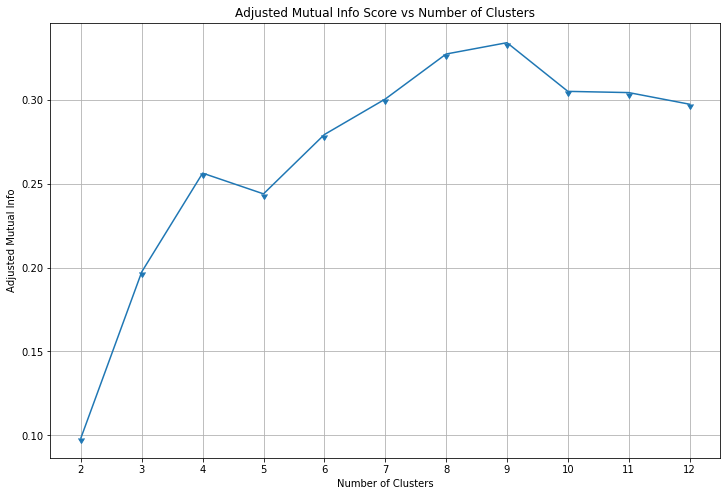

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.figure(figsize=(12,8))
plt.title("Adjusted Mutual Info Score vs Number of Clusters")
plt.ylabel("Adjusted Mutual Info")
plt.xlabel("Number of Clusters")
plt.grid(True)
plt.xticks(np.arange(11), np.arange(2, 13))
plt.plot(scores, marker=11)


# 2.5

We can say that the plot has the shape we expected. We see the trend that for a small number of clusters, the AMI we gain is low, and while the number of clusters gets bigger, AMI increases too. However, that does not hold for K=5. After a particular number of clusters, the information gain, starts to decrease (big number of clusters does not mean a better model). An interesting observation is that the optimal number of clusters it is not K = 8 (8 class targets in data) but K=9. However, there is only a small difference between the AMI these two gain.

In [10]:
kmeans = KMeans(n_clusters=4, random_state=1000, n_init = 50).fit(train_set_X)
pred = kmeans.predict(train_set_X)

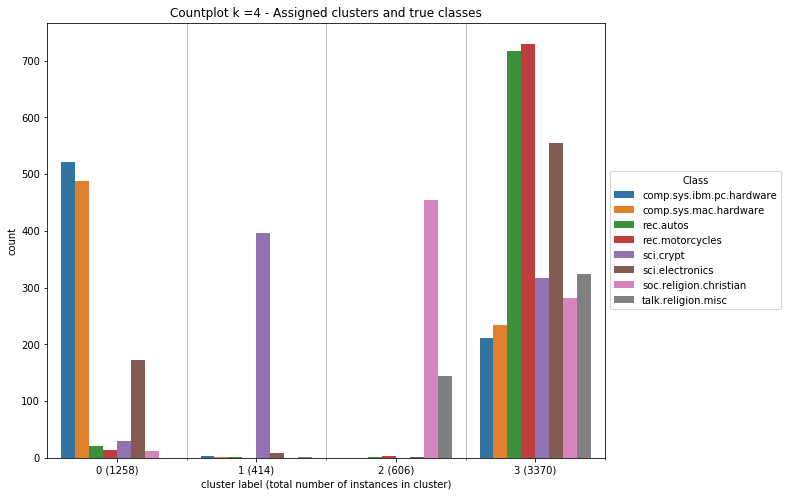

In [13]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x=kmeans.labels_, hue=train_set_y, ax=ax)
ax.legend(labels=['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware' ,'rec.autos','rec.motorcycles','sci.crypt','sci.electronics', 'soc.religion.christian', 'talk.religion.misc'], #  mixture class does not appear
          loc='center left', bbox_to_anchor=[1, 0.5], title='Class')

labels = ["0 (1258)","1 (414)","2 (606)","3 (3370)"]
ax.set_xticklabels(labels)
plt.gca().set_xticks([i + 0.5 for i in range(4)], minor=True)
    
plt.grid(True, which='minor')
plt.title("Countplot k =4 - Assigned clusters and true classes")
plt.xlabel('cluster label (total number of instances in cluster)')
plt.show()


Text(0.5, 1.0, 'Kmeans with k = 4')

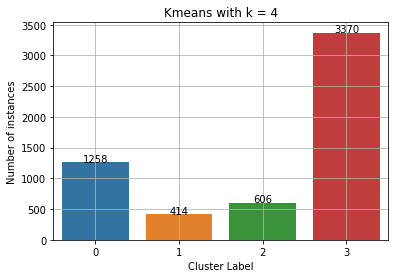

In [15]:
ax = sns.countplot(x = kmeans.labels_, data = pred_dataframe)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1,height ,ha="center")
ax.set_xlabel("Cluster Label")
plt.grid(True)
ax.set_ylabel("Number of instances")
ax.set_title("Kmeans with k = 4")

# 2.7

From the plot in the question 2.6 we see that the cluster 3 contains over the half of the instances. It seems that in clusters 0, 1 and 2, the classification is clear, since we observe some consistency on the data classification. However, this is not observed in the cluster 3, which has a large number of instances from all classes classified to it. In cluster 3, it is very difficult to observe a pattern, and we can say that this messes the clustering. That's why we have a low AMI for k = 4, as we have seen in Q2.5. Although, the three clusters give information about the data, with cluster 3 is very difficult to export conclusions and that leads the information gain not to be larger. 

# 3.1

F1-score is a useful metric of evaluation which is used to combine two other very useful metrics into a single number (Precision and Recall). It is always between these two numbers. It is preferable to accuracy, since we have an uneven class distribution and therefore accuracy would be a bad metric. 

A macro-average computes the metric independently for each class and then takes the average (treating all classes equally).

# 3.2

We use as a baseline classifier, a classifier which predicts always the most frequent class on train data. Thus, our classifier will always predict class 6. Its performance in the test set, is extremely low as we expected with f1_score = 0.0292. We could also use a random 


# 3.2

As we can see from the data distribution, the most frequent class is class 6. However this happens with a very small difference from other classes. That's why it is preferable not using a baseline predicting the most frequent class, but use a random classifier. Since it is random, we take the average f1score after 100 iterations which is 0.13. 

In [88]:
baseline_random = []
for i in range(test_set_y.size):
    baseline_random.append(np.random.randint(8))

from sklearn.metrics import f1_score

f1_score(test_set_y, baseline_random, average='macro')  

0.13038610196624323

In [91]:
baseline = []
for i in range(test_set_y.size):
    baseline.append(6)

from sklearn.metrics import f1_score

f1_score(test_set_y, baseline, average='macro')  

0.029197936210131333

# 3.3

Logistic Regression is a binary classifier, which means that it can classify an instance if it is in one class or not. A method we discussed in the lectures about Logistic Regression to classify multi-class labels, is the one which classifies data into k and not-k. This method is found in the documentation with the name "OvR - One vs Rest". In OvR Logistic Regression a seperate model is trained for each class predicting whether an instance is in that class or not using the softmax function.

In [92]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import explained_variance_score

skf = StratifiedKFold(n_splits=10, shuffle = True, random_state = 0)
f1_arr = []

for train_index, val_index in skf.split(train_set_X, train_set_y):
    tX = train_set_X.iloc[train_index]
    ty = train_set_y.iloc[train_index]
    valX = train_set_X.iloc[val_index]
    valy = train_set_y.iloc[val_index]
    clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(tX, ty)
    pred = clf.predict(valX)
    f1 = f1_score(valy, pred, average='macro')
    print(explained_variance_score(valy, pred) )
    f1_arr.append(f1)

0.5031667145226147
0.5216681871630211
0.582489270386266
0.5261125730055838
0.5150978756177396
0.5533572941402991
0.5325293626853218
0.5352295039981787
0.5377486428778935
0.5472807402650021


In [96]:
f1_arr = np.asarray(f1_arr)
print(f1_arr.mean())
print(f1_arr.std())

0.6689909262264606
0.016922045421971926


# 3.4

Validation set f1score = 0.669, Validation set Standard Deviation = 0.017\\

As we can see, the model here is way more accurate in terms of f1score comparing it to the baseline we used. The standard deviation of the f1score on the validation set is almost zero, so the validation set is well distributed, since there are no differences on the f1score in each fold.

In [117]:
np.geomspace(10e-4, 10e5, 19)

array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03, 3.16227766e+03, 1.00000000e+04, 3.16227766e+04,
       1.00000000e+05, 3.16227766e+05, 1.00000000e+06])

In [97]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from math import sqrt
from sklearn.metrics import mean_squared_error


av_f1_arr_train = []
av_f1_arr_val = []
sum_rmse_val_arr = []

C_param_range = np.geomspace(10e-4, 10e5, 19)
skf = StratifiedKFold(n_splits=10, shuffle = True, random_state = 0)

for c in C_param_range:
    sum_t = 0
    sum_val = 0
    sum_rmse_val = 0
    for train_index, val_index in skf.split(train_set_X, train_set_y):
        tX = train_set_X.iloc[train_index]
        ty = train_set_y.iloc[train_index]
        valX = train_set_X.iloc[val_index]
        valy = train_set_y.iloc[val_index]
        clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', C = c).fit(tX, ty)
        pred_train = clf.predict(tX)
        pred_val = clf.predict(valX)
        f1_train = f1_score(ty, pred_train, average='macro')
        #print(f1_train)
        f1_val = f1_score(valy, pred_val, average='macro')
        #print(f1_val)
        rms_val_pred = sqrt(mean_squared_error(valy, pred_val))
        sum_rmse_val += rms_val_pred
        sum_t += f1_train
        sum_val += f1_val
    sum_rmse_val_arr.append(sum_rmse_val/10)
    av_f1_arr_train.append(sum_t/10)
    av_f1_arr_val.append(sum_val/10)

print(av_f1_arr_train)
print(av_f1_arr_val)
print(sum_rmse_val_arr)

//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average

//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average

//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: l

//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: l

//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: l

[0.4184069235211976, 0.5835871117895345, 0.6286982582391885, 0.6414261892791014, 0.6846299833794128, 0.7587493540377248, 0.8169961852556069, 0.8662005498458976, 0.916734383077632, 0.9495438867114654, 0.9628699829228949, 0.9660640884699557, 0.9677569684046403, 0.9679482183334336, 0.9680810687533761, 0.9681316931090308, 0.9681875088913923, 0.9679111263535167, 0.9680448967489843]
[0.3978221586555387, 0.549401889558099, 0.5903162727489074, 0.6007943890141922, 0.6231661213731126, 0.6632928459845525, 0.6689909262264605, 0.6618615893645126, 0.6508673013752745, 0.6351927624582812, 0.6306581456843349, 0.6290397926441792, 0.6265514299120727, 0.6260673442815328, 0.6212917640148401, 0.622603362670217, 0.6196887999912131, 0.6192335682786636, 0.6186196289571227]
[1.7555714910924025, 1.5522404864844215, 1.5332904043693247, 1.5192452921506239, 1.5161356994032764, 1.4921842231729345, 1.5076673701373338, 1.5440827855760917, 1.5957250945380672, 1.6515906243311325, 1.6634948851320353, 1.6745763756602823, 

//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [99]:
f1_val_array = np.asarray(av_f1_arr_val)
rmse_val_array = np.asarray(sum_rmse_val_arr)

In [100]:
print(rmse_val_array.mean())
print(f1_val_array.mean())

1.6201610436466998
0.6134452680627951


<Figure size 432x288 with 0 Axes>

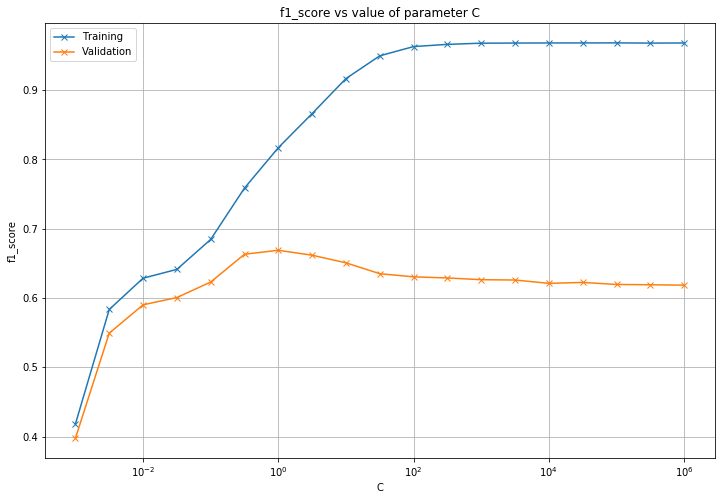

In [103]:
fig = plt.figure()
plt.figure(figsize=(12,8))
plt.title("f1_score vs value of parameter C")
plt.ylabel("f1_score")
plt.xlabel("C")
plt.xscale('log')
gr = []
gr.append(av_f1_arr_train)
gr.append(av_f1_arr_val)
gr = np.transpose(gr)
plt.plot(C_param_range, gr, marker='x')
plt.grid(True)
plt.gca().legend(('Training','Validation'))
plt.show()


# 3.6

We see from the plot, that for small values of C, the performance is very low. But while we increase the value of parameter C, the performance gets better, until we reach the maxium performance. Small values of C increase the regularization which means that simpler models are created, underfitting the data. By using bigger values of C, the model increases its complexity and adjust better to the data. However, if we increase the value of C too much, it overfits the data. I selected C=1 (f1 = 0.669), since it seems that although it is not the optimal value for training set, this is the optimal value of C in validation set. 

In [105]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', C = 1, max_iter = 200).fit(train_set_X, train_set_y)

pred_test = clf.predict(test_set_X)
f1 = f1_score(test_set_y, pred_test, average='macro')

print(f1)


0.6747698176259582


# 3.7

After retraining on the entire training set and using C=1, the score for the test set is 0.6748. This is very close to the f1 score we got from the validation set, using the regularisation paramenter C=1. 

# 4.1

The data now are classified into 4 superclasses which are more clearly separated than before. The problem we faced in k-means when the number of clusters was 4, now it no longer exists. The data are seperated into the 4 superclasses which are like 4 different datasets, and the classification can be done to each of the superclass seperately, in order to find the class of each instance.

In [107]:
data_path = os.path.join(os.getcwd(), 'Data/PartA', "20ng_train_hierarchical.csv")
train_set = pd.read_csv(data_path, compression = "bz2")
h_train_set_y = train_set["class"]
hsuper_train_set_y = train_set["super"]
h_train_set_X = train_set.drop(columns = "class")
h_train_set_X = h_train_set_X.drop(columns = "super")

In [108]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
av_f1_arr_train = []
av_f1_arr_val = []
C_param_range = np.geomspace(10e-4, 10e5, 19)
skf = StratifiedKFold(n_splits=10, shuffle = True, random_state = 0)

for c in C_param_range:
    sum_t = 0
    sum_val = 0
    for train_index, val_index in skf.split(h_train_set_X, hsuper_train_set_y):
        tX = h_train_set_X.iloc[train_index]
        ty = hsuper_train_set_y.iloc[train_index]
        valX = h_train_set_X.iloc[val_index]
        valy = hsuper_train_set_y.iloc[val_index]
        clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', C = c).fit(tX, ty)
        pred_train = clf.predict(tX)
        pred_val = clf.predict(valX)
        f1_train = f1_score(ty, pred_train, average='macro')
        print(f1_train)
        f1_val = f1_score(valy, pred_val, average='macro')
        print(f1_val)
        sum_t += f1_train
        sum_val += f1_val
    av_f1_arr_train.append(sum_t/10)
    av_f1_arr_val.append(sum_val/10)

print(av_f1_arr_train)
print(av_f1_arr_val)

//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4876340310947397
0.4732370394641037
0.4871789203345295
0.46840240484615814


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4907475813032674
0.46442779989291616


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.48882663602274146
0.47041600214033763


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4872141092308655
0.4946796789066855


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.48604951671470953
0.4919959538540588


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.48962964435064704
0.468573374867221


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4871410688951235
0.473970527854023


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4900358422033421
0.4688506729394076


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.48516469411330737
0.46720729433495395
0.6054748564556335
0.599368001163224
0.608923301761815
0.5706555763514218
0.6091482051442587
0.566054340513373
0.6027622220576524
0.6076008781742559
0.6048273876406466
0.6127472307165573
0.6028389756177636
0.6068330881924373
0.6102117123177061
0.5783150339927513
0.6088785970336404
0.5817338188484139
0.6104570983522003
0.5647061121239133
0.600345463353785
0.6085159243661236
0.761262147294551
0.7578159496246808
0.7645102241737353
0.7438498750424272
0.764406630292035
0.7318443635503293
0.7617168405468759
0.7638256130447794
0.7649480794688444
0.7450754223538534
0.763514112671685
0.7618499960186713
0.7670618670303695
0.727318615741692
0.7629895726746506
0.7421227496144256
0.7650973702736191
0.7062882044460081
0.7601026783540576
0.75433388145237
0.8226200213358688
0.8078648275418665
0.8199658390281994
0.8058477089244296
0.8210429897737601
0.7990077093529446
0.8205408892596571
0.8141610635791423
0.8254497760970737
0.7980341354762572
0.8213036879355888
0

//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9145406488148081
0.8195324131828123


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9165489280979456
0.8231393390847511


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.91331570825947
0.821810570605499


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9128102296042031
0.8249094318478432


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9150496150548626
0.8105537605369597


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9112582841911201
0.8287872756958778


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.917604531623782
0.8061479612480386


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9166867914462462
0.8084960704929746


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9165255488196923
0.7986486414029628


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9167487946219894
0.8271565333642189


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9365330874271058
0.8021834925102638


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9403268248145319
0.8046997272194659


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9357896542186988
0.8111219248722659


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9357072275523306
0.8187020255526314


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9374364131515115
0.8014113264360732


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9381840025843153
0.8076034244466841


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9382923216168821
0.7929021655522566


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9388123148979511
0.8033648739791444


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9378690770018555
0.7871390253840606


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9370975188344473
0.8195759758208501


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9531919914566167
0.7769739839937704


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9564876110328691
0.7935683116283374


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9548025926475798
0.794816920156119


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9524295313908203
0.7950575879230153


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9555957114282194
0.791960424320209


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9526606921981129
0.7843092320760134


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9561972516553836
0.7809543007921917


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9549827577035679
0.7787282099388599


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9574065189452985
0.7648092673357734


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9531924052806161
0.8158603506509909


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9636668630217468
0.7705567913035876


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9666191559029453
0.7940965742947329


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9657071611669418
0.7783548163585379


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9635626498122
0.7904050172481263


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9651546752101965
0.7716192813155522


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9649011191050623
0.7726551533024298


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9649289034921879
0.7858726455184804


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9662312204680166
0.7677581950808614


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.965768993753966
0.7612471640944567


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9626972842835205
0.8038601589539204


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9715287056138895
0.767693273137087


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9704279354497128
0.7825336616097471


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9712488075024002
0.7710371967063324


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9689039944773756
0.7877422911203795


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9706726025750984
0.7750427276641758


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9681684346419916
0.7708438577523881


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9704644425005233
0.7790652619785084


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9714044679264808
0.7680828042594449


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9714827762243118
0.7548071821681788


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9685887452630504
0.8035274532207859


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.971874389700536
0.7771055201797255


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9731099092064524
0.7917829299808965


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9725516825481847
0.7721834786657534


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9721417592867281
0.7903616458663558


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9714523695308646
0.7595246186549613


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9702581965936733
0.7764065808124205


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9733443934979281
0.7775278220737701


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9738719519902254
0.7654286243804064


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9728146146067239
0.7650221607524584


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9701238740481299
0.808605211360162


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9724610527967884
0.7775564674545999


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9735079827338302
0.7914802728785617


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.972570586491049
0.7786410207129024


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.972334025871302
0.7927728115622963


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9713743369619398
0.7723674337955196


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9708250261922393
0.7747970123842811


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9739060223699887
0.772105905264195


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9740755975399069
0.7691028241535341


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9731931626809831
0.7653728706289805


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9714548553468942
0.8030665610515131


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.972855503523071
0.7775674822900599


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9733061544855987
0.7862826576236092


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9727864137285016
0.7789590483046507


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9727278671191907
0.7876045781666534


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9721861815120298
0.77026470080241


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9707988141761077
0.7712922146114498


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.974108943572331
0.7681706327424355


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9740708196148431
0.7643042023035195


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9731930582103099
0.7686551002966829


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9700881624813386
0.8018006017029335


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9726721423185116
0.7790425739014448


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9733111463992513
0.7772501297624155


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9725849696852051
0.7806116641013962


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9727381230569057
0.7863657899579195


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9723940033902859
0.7703310153722527


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9706578833678685
0.7714878036939543


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9738697272322118
0.7609129678434642


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9740754038120989
0.7591879986202943


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9732302613066273
0.7637892218939074


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9706311066870047
0.8016296547167769


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9726681427912944
0.7774633894950713


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9733061544855987
0.7772501297624155


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.972392425226948
0.7826126595206028


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.972734609324472
0.7752102181301035


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9725708925206155
0.7688631895037968


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9707837719259961
0.7696196955993144


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.974108943572331
0.7717016592510197


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9742724773806302
0.7674002374636069


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9730005582723589
0.7685253100160114


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9708578145335749
0.8088461440492403


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9728606246689573
0.7734218546436773


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9735029306026965
0.777289883089386


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9723783049178307
0.782221713018545


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9727294779052712
0.7878651034891012


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9720237822682691
0.7708183121716339


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9714286103503743
0.7709725401294631


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9736870934120161
0.7682434990578431


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.974056921895419
0.7615520454679039


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9730006825489648
0.7684218726082166


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9716521733656451
0.801616446918989


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9728648836221654
0.773255650671557


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9733107396297153
0.7737811111595614


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9725766155706131
0.7787281428930477


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9727330042033843
0.777170300706859


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9725808784524618
0.7688631895037968


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9707876636264829
0.7749360751015666


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9736723699563455
0.7648632698900095


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9740566559458521
0.7639250088905244


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9730006825489648
0.7686080405771248
0.9633918156902558
0.7963914269219342
[0.4879622044263273, 0.6063867819735101, 0.7635609522780424, 0.8224007422408575, 0.8495251693061732, 0.8698547516183396, 0.8917837306911706, 0.9151089080534118, 0.9376048442099629, 0.9546947063739084, 0.9649238026216784, 0.9702890912174833, 0.9721543141009448, 0.9725702648984921, 0.9726121918423323, 0.9726164767255971, 0.9726695790033821, 0.9727320601935443, 0.9718975309246242]
[0.4741760749099866, 0.5896530004442472, 0.7434324670889236, 0.7957057373567136, 0.8149769050730757, 0.8265991968423039, 0.8238556608697438, 0.8169181997461937, 0.8048703961773696, 0.787703858881528, 0.7796425797470686, 0.7760375709617028, 0.778394859272691, 0.7797263179886385, 0.7774901218844404, 0.7750608819863827, 0.7767492632791181, 0.776242327059476, 0.7740522216315981]


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


<Figure size 432x288 with 0 Axes>

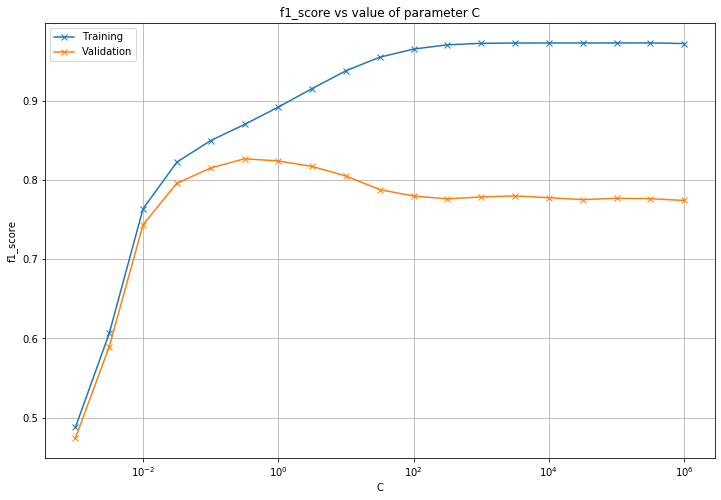

In [109]:
fig = plt.figure()
plt.figure(figsize=(12,8))
plt.title("f1_score vs value of parameter C")
plt.ylabel("f1_score")
plt.xlabel("C")
plt.xscale('log')
gr = []
gr.append(av_f1_arr_train)
gr.append(av_f1_arr_val)
gr = np.transpose(gr)
plt.grid(True)
plt.plot(C_param_range, gr, marker='x')
plt.gca().legend(('Training','Validation'))
plt.show()

# 4.2

The best validation set f1score is 0.8266 when the value of parameter C = 0.316. The score is high, since we have to predict the superclasses. The boundaries between the superclasses are more clear. We cannot compare this result with the previous ones, since they are completely different things. Previously we had to classify the data into 8 classes, but now only 4.

# 4.3

Since we have a classification problem, the target values are known, so we use these in order to evaluate the model. The superclasses which were predicted from the above classifier, contain some misclassifications, which will lead to false results. So we use the known superclass labels, to evaluate the model. Using the true labels, we assume that we have 4 different datasets, completely unrelated with each other, so the results will be better.

In [110]:
grouped = train_set.groupby('super')


In [111]:
class0 = grouped.get_group(0)
class0_y = class0["class"]
class0_X = class0.drop(columns = ["super", "class"])

class1 = grouped.get_group(1)
class1_y = class1["class"]
class1_X = class1.drop(columns = ["super", "class"])

class2 = grouped.get_group(2)
class2_y = class2["class"]
class2_X = class2.drop(columns = ["super", "class"])

class3 = grouped.get_group(3)
class3_y = class3["class"]
class3_X = class3.drop(columns = ["super", "class"])

In [119]:
np.geomspace(10e-4, 10e5, 19)

array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03, 3.16227766e+03, 1.00000000e+04, 3.16227766e+04,
       1.00000000e+05, 3.16227766e+05, 1.00000000e+06])

In [128]:
C_param_range = np.geomspace(10e-4, 10e5, 19)

val_scores = []
for c in C_param_range:
    sum_val_score = 0
    for train_index, val_index in skf.split(class0_X, class0_y):
        train_class0_X = class0_X.iloc[train_index]
        train_class0_y = class0_y.iloc[train_index]
        val_class0_X = class0_X.iloc[val_index]
        val_class0_y = class0_y.iloc[val_index]
        clf = LogisticRegression(random_state=0, solver='lbfgs', C = c).fit(train_class0_X, train_class0_y)
        pred_val_class0 = clf.predict(val_class0_X)
        f1_val_class = f1_score(val_class0_y, pred_val_class0, average='macro')
        sum_val_score += f1_val_class
    val_scores.append(sum_val_score/10)

val_scores

//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average

//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: l

//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: l

[0.3356088595700037,
 0.5136134497566854,
 0.7086905213912644,
 0.7721822054976146,
 0.7866681976320804,
 0.7983944208214652,
 0.799754728943129,
 0.796281109469942,
 0.7887532888814294,
 0.7792678709480447,
 0.7613848485124305,
 0.7476862479784032,
 0.7401757115593274,
 0.7354125844705977,
 0.7319808006810689,
 0.7380097756343917,
 0.7447845089089516,
 0.7441408677626384,
 0.7585879806188913]

###### FOR CLASS 0: C = 1, F1_SCORE = 0.7998

In [120]:
val_scores = []
for c in C_param_range:
    sum_val_score = 0
    for train_index, val_index in skf.split(class1_X, class1_y):
        train_class1_X = class1_X.iloc[train_index]
        train_class1_y = class1_y.iloc[train_index]
        val_class1_X = class1_X.iloc[val_index]
        val_class1_y = class1_y.iloc[val_index]
        clf = LogisticRegression(random_state=0, solver='lbfgs', C = c).fit(train_class1_X, train_class1_y)
        pred_val_class1 = clf.predict(val_class1_X)
        f1_val_class = f1_score(val_class1_y, pred_val_class1, average='macro')
        sum_val_score += f1_val_class
    val_scores.append(sum_val_score/10)

val_scores

//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: l

//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: l

//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: l

[0.603778858501332,
 0.7251820614235328,
 0.7693469232406847,
 0.772561226161632,
 0.7807998296802563,
 0.7751263981375843,
 0.7891251843175724,
 0.784570515310795,
 0.7824797878583254,
 0.7701797688273092,
 0.761112267518995,
 0.7466864186693806,
 0.7407098427150831,
 0.7428080153466474,
 0.7435112659609877,
 0.75604277437191,
 0.7541759635734162,
 0.7561795371951604,
 0.7582926948879021]

###### FOR CLASS 1: C = 1, F1_SCORE = 0.7891

In [121]:
val_scores = []
for c in C_param_range:
    sum_val_score = 0
    for train_index, val_index in skf.split(class2_X, class2_y):
        train_class2_X = class2_X.iloc[train_index]
        train_class2_y = class2_y.iloc[train_index]
        val_class2_X = class2_X.iloc[val_index]
        val_class2_y = class2_y.iloc[val_index]
        clf = LogisticRegression(random_state=0, solver='lbfgs', C = c).fit(train_class2_X, train_class2_y)
        pred_val_class2 = clf.predict(val_class2_X)
        f1_val_class = f1_score(val_class2_y, pred_val_class2, average='macro')
        sum_val_score += f1_val_class
    val_scores.append(sum_val_score/10)

val_scores

//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: l

//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: l

[0.6371074604622435,
 0.8788172974224521,
 0.8585661676240838,
 0.8521204381059718,
 0.8613374703972132,
 0.8719662350726255,
 0.881245102160286,
 0.8841814102199045,
 0.8802244399514925,
 0.8796613677459382,
 0.8701858814569562,
 0.8648010679586378,
 0.8641498911249963,
 0.8627856699022983,
 0.8648191651886833,
 0.8675144906143736,
 0.8634928660603574,
 0.870225715966525,
 0.8736355151405043]

###### FOR CLASS 2: C = 3.16, F1_SCORE = 0.8842

In [122]:
val_scores = []
for c in C_param_range:
    sum_val_score = 0
    for train_index, val_index in skf.split(class3_X, class3_y):
        train_class3_X = class3_X.iloc[train_index]
        train_class3_y = class3_y.iloc[train_index]
        val_class3_X = class3_X.iloc[val_index]
        val_class3_y = class3_y.iloc[val_index]
        clf = LogisticRegression(random_state=0, solver='lbfgs', C = c).fit(train_class3_X, train_class3_y)
        pred_val_class3 = clf.predict(val_class3_X)
        f1_val_class = f1_score(val_class3_y, pred_val_class3, average='macro')
        sum_val_score += f1_val_class
    val_scores.append(sum_val_score/10)

val_scores

//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average

//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average

//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: l

//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: l

[0.38027368570515785,
 0.38027368570515785,
 0.38027368570515785,
 0.38027368570515785,
 0.4132961629369067,
 0.6197142505567805,
 0.6879216197133061,
 0.7049919766698413,
 0.7019005161153059,
 0.6897762948473026,
 0.6868024203076635,
 0.6617025924409603,
 0.6560361593630681,
 0.6560828793757312,
 0.6658305805011522,
 0.6739012860945836,
 0.6775651990626211,
 0.6776323603734674,
 0.671231728394521]

###### FOR CLASS 3: C = 3.16, F1_SCORE = 0.7050

In [3]:
table = []

table.append([1, 0.8000])
table.append([1, 0.789])
table.append([3.16, 0.884])
table.append([3.16, 0.705])

In [4]:
table_df = pd.DataFrame(table)

In [5]:
table_df.columns = ["Value of C", "Corresponding f1_score"]

In [6]:
table_df

,Value of C,Corresponding f1_score
0,1.00,0.800
1,1.00,0.789
2,3.16,0.884
3,3.16,0.705


In [2]:
from sklearn.linear_model import LogisticRegression
data_path = os.path.join(os.getcwd(), 'Data/PartA', "20ng_test.csv")
test_set = pd.read_csv(data_path, compression = "bz2")
test_set_y = test_set["class"]
test_set_X = test_set.drop(columns = "class")


data_path = os.path.join(os.getcwd(), 'Data/PartA', "20ng_train_hierarchical.csv")
train_set = pd.read_csv(data_path, compression = "bz2")
h_train_set_y = train_set["class"]
hsuper_train_set_y = train_set["super"]
h_train_set_X = train_set.drop(columns = "class")
h_train_set_X = h_train_set_X.drop(columns = "super")


In [3]:
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(h_train_set_X, hsuper_train_set_y)
pred_test_super_class = clf.predict(test_set_X)
#f1_test_sclass = f1_score(hsuper_train_set_y, pred_test_super_class, average='macro')
#f1_test_sclass

//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [4]:
pred_new = pred_test_super_class.tolist()

In [5]:
sclass0_indices = []
sclass1_indices = []
sclass2_indices = []
sclass3_indices = []

for i in range(len(pred_new)):
    if pred_new[i] == 0:
        sclass0_indices.append(i)
    if pred_new[i] == 1:
        sclass1_indices.append(i)
    if pred_new[i] == 2:
        sclass2_indices.append(i)
    if pred_new[i] == 3:
        sclass3_indices.append(i)
        
print(len(sclass0_indices))
print(len(sclass1_indices))
print(len(sclass2_indices))
print(len(sclass3_indices))


473
555
469
386


In [7]:
sclass0_X_train = h_train_set_X.iloc[sclass0_indices]
sclass0_y_train = h_train_set_y.iloc[sclass0_indices]
sclass0_X_test = test_set_X.iloc[sclass0_indices]
sclass0_y_test = test_set_y.iloc[sclass0_indices]

sclass1_X_train = h_train_set_X.iloc[sclass1_indices]
sclass1_y_train = h_train_set_y.iloc[sclass1_indices]
sclass1_X_test = test_set_X.iloc[sclass1_indices]
sclass1_y_test = test_set_y.iloc[sclass1_indices]

sclass2_X_train = h_train_set_X.iloc[sclass2_indices]
sclass2_y_train = h_train_set_y.iloc[sclass2_indices]
sclass2_X_test = test_set_X.iloc[sclass2_indices]
sclass2_y_test = test_set_y.iloc[sclass2_indices]

sclass3_X_train = h_train_set_X.iloc[sclass3_indices]
sclass3_y_train = h_train_set_y.iloc[sclass3_indices]
sclass3_X_test = test_set_X.iloc[sclass3_indices]
sclass3_y_test = test_set_y.iloc[sclass3_indices]

In [8]:
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(sclass0_X_train, sclass0_y_train)
pred_test_super_class0 = clf.predict(sclass0_X_test)

clf = LogisticRegression(random_state=0, solver='lbfgs').fit(sclass1_X_train, sclass1_y_train)
pred_test_super_class1 = clf.predict(sclass1_X_test)

clf = LogisticRegression(random_state=0, solver='lbfgs').fit(sclass2_X_train, sclass2_y_train)
pred_test_super_class2 = clf.predict(sclass2_X_test)

clf = LogisticRegression(random_state=0, solver='lbfgs').fit(sclass3_X_train, sclass3_y_train)
pred_test_super_class3 = clf.predict(sclass3_X_test)

//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning

In [9]:
from sklearn.metrics import f1_score

print(f1_score(sclass0_y_test, pred_test_super_class0, average='macro')) 
print(f1_score(sclass1_y_test, pred_test_super_class1, average='macro'))
print(f1_score(sclass2_y_test, pred_test_super_class2, average='macro')) 
print(f1_score(sclass3_y_test, pred_test_super_class3, average='macro')) 
suma = 0

suma += f1_score(sclass0_y_test, pred_test_super_class0, average='macro')*473
suma += f1_score(sclass1_y_test, pred_test_super_class1, average='macro')*555
suma += f1_score(sclass2_y_test, pred_test_super_class2, average='macro')*469
suma += f1_score(sclass3_y_test, pred_test_super_class3, average='macro')*386
avg = suma/1883
print("average: ", avg)

0.22841189674523005
0.2555531158869316
0.2922016254081311
0.20870155948469202
average:  0.24825925159598802


//anaconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# 4.5

It seems that the hierarchical classification works much worse on the dataset (0.25) than the single layer classifier. It does not work as we would expect, since it does not improve the performance of the classifier. This happens because we have a bad classification when we try to assign the superclasses to the instances and then since we have some error there, the error will be enlarged in binary classifications.